In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Stochastic gradient descent: Using linear regression as an example

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
#Our goal: y_data = b + w.x_data

In [3]:
x = np.arange(-200, -100, 1) #bias
y = np.arange(-5, 5, 0.1) #weights
#len(x)=100, len(y)=100

In [4]:
#Construct the error map
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n]- b- w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)    

## i. Usual gradient descent

In [5]:
b = -120 #initial b
w = -4 #initial w
#lr = 0.0000001 (too slow)
lr = 1
iteration = 700000
timerange=0.2

In [6]:
#Store initial values for plotting
b_history = [b]
w_history = [w]

#Gradient descent is too slow; use Adagrad!!
lr_b = 0.0
lr_w = 0.0

In [7]:
#Iterations
starttime=time()
j=0
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad -= 2.0*(y_data[n]-b - w*x_data[n])*1.0
        w_grad -= 2.0*(y_data[n]-b - w*x_data[n])*x_data[n]
    #update lr
    lr_b += b_grad**2
    lr_w += w_grad**2
    #update parameters
    b -= lr/np.sqrt(lr_b)*b_grad
    w -= lr/np.sqrt(lr_w)*w_grad
    #store
    b_history.append(b)
    w_history.append(w)
    j=j+1
    if time()-starttime>timerange:
        break
timerange=time()-starttime        
print('總共跑了',j,'回，總共費時：',timerange)  

總共跑了 10331 回，總共費時： 0.20005297660827637


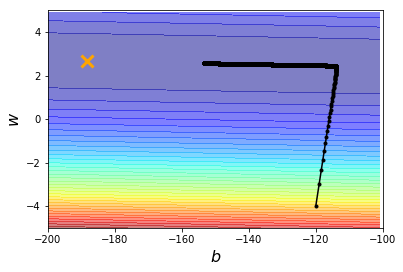

In [8]:
#plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap = plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms =12, markeredgewidth=3, color = 'orange')
plt.plot(b_history, w_history, 'o-', ms =3, lw= 1.5, color = 'black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize = 16)
plt.ylabel(r'$w$', fontsize = 16)
plt.show()

## ii. Stochastic gradient descent [batch size << len(x_data)]

In [9]:
b = -120 #initial b
w = -4 #initial w
#lr = 0.0000001 (too slow)
lr = 1
iteration = 700000
timerange=0.2

In [10]:
#Store initial values for plotting
b_history2 = [b]
w_history2 = [w]

#GD too slow; again use Adagrad!! 
lr_b = 0.0
lr_w = 0.0

In [11]:
#Iterations; use extreme (crazy?) stochastic gradient descent, i.e., batch size=1!!
starttime=time()
j=0
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = -2.0*(y_data[n]-b - w*x_data[n])*1.0
        w_grad = -2.0*(y_data[n]-b - w*x_data[n])*x_data[n]
        #update lr
        lr_b += b_grad**2
        lr_w += w_grad**2
        #update parameters
        b -= lr/np.sqrt(lr_b)*b_grad
        w -= lr/np.sqrt(lr_w)*w_grad
        
    #store
    b_history2.append(b)
    w_history2.append(w)
    j=j+1
    if time()-starttime>timerange:
        break
timerange=time()-starttime        
print('總共跑了',j,'回，總共費時：',timerange)  

總共跑了 3946 回，總共費時： 0.2001028060913086


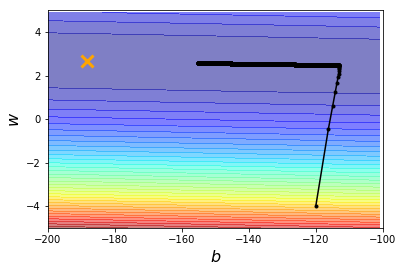

In [12]:
#plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap = plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms =12, markeredgewidth=3, color = 'orange')
plt.plot(b_history2, w_history2, 'o-', ms =3, lw= 1.5, color = 'black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize = 16)
plt.ylabel(r'$w$', fontsize = 16)
plt.show()